In [ ]:
import pickle
from keras.utils import np_utils
from sklearn.utils import shuffle

#import du lieu
with open('myImg.pickle', 'rb') as f:
  (x, y) = pickle.load(f)


# chia du lieu train
x_train = x[:200]
y_train = y[:200]
#reshape

# ep kieu
x_train = x_train.astype('float32')
x_train /= 255
#encoding
y_train = np_utils.to_categorical(y_train, 3)
x_train, y_train = shuffle(x_train, y_train)
print(x_train.shape, y_train.shape)

(200, 150, 150, 3) (200, 3)


In [ ]:
# tao model
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from tensorflow.keras.optimizers import SGD, Adam
from keras.layers.pooling import MaxPooling2D
model = Sequential()
model.add(Conv2D(32, (3,3), kernel_initializer= 'he_uniform', padding = 'same', input_shape= (150, 150, 3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), kernel_initializer='he_uniform', padding= 'same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), kernel_initializer= 'he_uniform', padding= 'same'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(128, activation= 'relu', kernel_initializer= 'he_uniform'))
model.add(Dense(128, activation= 'relu', kernel_initializer= 'he_uniform'))
model.add(Dense(128, activation= 'relu', kernel_initializer= 'he_uniform'))
model.add(Dense(3, activation= 'softmax'))
model.summary()
opt = SGD(lr = 0.01, momentum= 0.9)

#compile & train model
model.compile(optimizer= Adam(), loss= 'binary_crossentropy', metrics= 'accuracy')
history = model.fit(x_train, y_train, batch_size= 1024, epochs= 10, validation_split= 0.2)


Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_60 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_56 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_61 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_57 (MaxPoolin  (None, 37, 37, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_62 (Conv2D)          (None, 37, 37, 128)       73856     
                                                                 
 max_pooling2d_58 (MaxPoolin  (None, 18, 18, 128)    

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


160/160 [==============================] - 1s 6ms/step - loss: 2.0252 - accuracy: 0.8750 - val_loss: 1.3661e-09 - val_accuracy: 1.0000
Epoch 2/10
160/160 [==============================] - 1s 5ms/step - loss: 3.9808e-08 - accuracy: 1.0000 - val_loss: 2.7852e-12 - val_accuracy: 1.0000
Epoch 3/10
160/160 [==============================] - 1s 5ms/step - loss: 2.5239e-11 - accuracy: 1.0000 - val_loss: 2.7643e-12 - val_accuracy: 1.0000
Epoch 4/10
160/160 [==============================] - 1s 5ms/step - loss: 2.5225e-11 - accuracy: 1.0000 - val_loss: 2.7643e-12 - val_accuracy: 1.0000
Epoch 5/10
160/160 [==============================] - 1s 5ms/step - loss: 2.5225e-11 - accuracy: 1.0000 - val_loss: 2.7643e-12 - val_accuracy: 1.0000
Epoch 6/10
160/160 [==============================] - 1s 5ms/step - loss: 2.5225e-11 - accuracy: 1.0000 - val_loss: 2.7643e-12 - val_accuracy: 1.0000
Epoch 7/10
160/160 [==============================] - 1s 5ms/step - loss: 2.5225e-11 - accuracy: 1.0000 - val_loss:

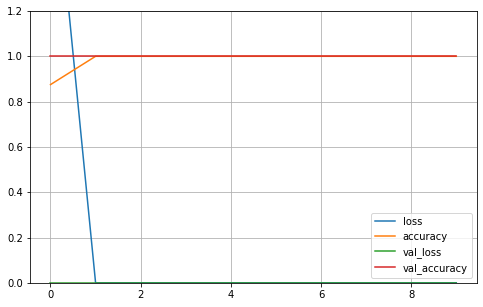

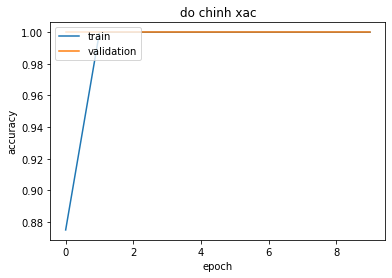

In [ ]:
#ve do thi 
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(figsize= (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1.2)
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('do chinh xac')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc = 'upper left')
plt.show()

(1, 150, 150, 3)
1
Nhận diện là Kiệt


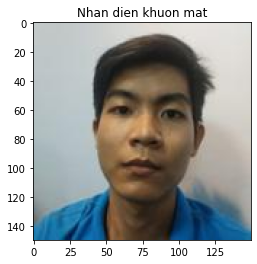

(1, 150, 150, 3)
0
Ai mà nhìn lạ quá trời :v 


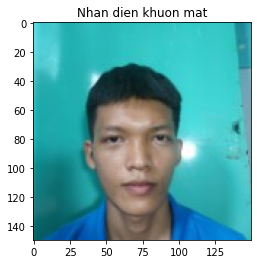

(1, 150, 150, 3)
2
Ai mà nhìn lạ quá trời :v 


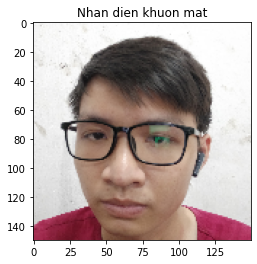

In [ ]:
from pandas.core.arrays.numeric import T
import cv2
import numpy as np
def predict(n):
  z_test = x[int(n)]
  image = z_test.reshape(-1,150,150,3)
  image = image.astype('float32')
  image /= 255
  print(image.shape)
  plt.title("Nhan dien khuon mat")
  pred= np.argmax(model.predict(image))
  print(pred)
  if pred == 1:
    print("Nhận diện là Kiệt")
  else:
    print("Ai mà nhìn lạ quá trời :v ")
  plt.imshow(cv2.cvtColor(z_test, cv2.COLOR_BGR2RGB))
  plt.show()
predict(31)
predict(50)
predict(177)